In [1]:
print(__doc__)

# Code source adapted from: Jaques Grobler
# License: BSD 3 clause

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import os
import csv
import pprint
import time
import itertools
import NeuralNetworkModel as NNM
import LogisticRegressionModel as LRM
import SoftmaxRegressionModel as SRM
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pp = pprint.PrettyPrinter(indent=4)

Automatically created module for IPython interactive environment


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
# Read and treat training dataset
dataset_train = pandas.read_csv('fashion-mnist-dataset/fashion-mnist_train.csv').values #np.genfromtxt('fashion-mnist-dataset/fashion-mnist_train.csv', delimiter=',')
y_true = dataset_train[:,0]
dataset_train = np.delete(dataset_train, 0, 1).T
dataset_train = dataset_train / dataset_train.max()

# Read and treat test dataset
dataset_test = pandas.read_csv('fashion-mnist-dataset/fashion-mnist_test.csv').values
target_test = dataset_test[:,0]
dataset_test = np.delete(dataset_test, 0, 1).T
dataset_test = dataset_test / dataset_test.max()

# Separate train dataset in Train and Validation Data
half = len(y_true)//2

data_train = dataset_train[:,:half]
target_train = y_true[:half]
data_val = dataset_train[:,half:]
target_val = y_true[half:]

In [4]:
#######################################
#######                         #######
#######     Neural Network      #######
#######                         #######  
#######################################

neural_model_sigmoid_1 = NNM.Model(data_train, target_train, activation="sigmoid", epochs=1, alpha=0.01, l_hidden=2, hidden_neurons=512, batch_size=1, use_softmax=False)
decay = 0.5
for i in range(10):
    neural_model_sigmoid_1.fit()

    neural_y_pred = neural_model_sigmoid_1.Predict(data_val, target_val)
    print(confusion_matrix(target_val, neural_y_pred))
    print(classification_report(target_val, neural_y_pred))
    
    neural_model_sigmoid_1.alpha *= 1/(1 + decay * (i+1))

Epochs: 1 / 1:   0%|          | 0/30000 [00:00<?, ?it/s]/home/matheusmortatti/git/Machine-Learning-Class/Assignment02/NeuralNetworkModel.py:183: ComplexWarning: Casting complex values to real discards the imaginary part
  self.D[k] += np.float64(np.multiply.outer(a.flatten(), err.flatten())).T
/home/matheusmortatti/git/Machine-Learning-Class/Assignment02/NeuralNetworkModel.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  self.bD[k] += np.float64(err)
Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:59:22<00:00,  4.30it/s]  


[[2219    6  193  166    6    7  324    1   41    0]
 [   9 2783   64  115    8    1   13    0    5    0]
 [  15    0 2706   20   97    0  155    1   14    0]
 [  95   14  114 2531  117    4   99    0   13    0]
 [   3    3 1075  121 1650    1  233    0   14    0]
 [   2    0    7    1    0 2699    2  178   25  104]
 [ 430    6  732   83  162    2 1497    1   48    1]
 [   0    0    2    0    0   76    0 2712    6  148]
 [   5    2   76   14    8   20   67   32 2782    1]
 [   0    0    4    1    0   39    2  121    4 2842]]
             precision    recall  f1-score   support

          0       0.80      0.75      0.77      2963
          1       0.99      0.93      0.96      2998
          2       0.54      0.90      0.68      3008
          3       0.83      0.85      0.84      2987
          4       0.81      0.53      0.64      3100
          5       0.95      0.89      0.92      3018
          6       0.63      0.51      0.56      2962
          7       0.89      0.92      0.91  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:56:30<00:00,  3.66it/s]  


[[2630    7   40  115   10    6  117    1   37    0]
 [  33 2865   14   69   10    0    4    0    3    0]
 [ 100    3 2249   36  323    0  280    2   15    0]
 [ 176   28   14 2568  118    1   74    0    8    0]
 [  33    3  319  115 2309    3  305    0   13    0]
 [   4    0    0    2    0 2826    2  128    9   47]
 [ 774    7  267   77  210    3 1587    3   34    0]
 [   1    0    0    0    0  113    0 2748    4   78]
 [  35    1   20   26   11   33   63   30 2788    0]
 [   1    1    0    1    0   68    0  146    1 2795]]
             precision    recall  f1-score   support

          0       0.69      0.89      0.78      2963
          1       0.98      0.96      0.97      2998
          2       0.77      0.75      0.76      3008
          3       0.85      0.86      0.86      2987
          4       0.77      0.74      0.76      3100
          5       0.93      0.94      0.93      3018
          6       0.65      0.54      0.59      2962
          7       0.90      0.93      0.92  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:42:43<00:00,  4.98it/s]


[[2431   14   75   57   25    7  308    1   45    0]
 [  13 2904   18   34   22    0    4    0    3    0]
 [  34    3 2339   17  439    0  161    0   15    0]
 [ 159   63   38 2370  238    2  106    0   11    0]
 [  10    3  275   53 2618    2  127    0   12    0]
 [   2    1    1    1    1 2810    1  138   17   46]
 [ 435   11  341   40  372    4 1712    2   45    0]
 [   0    0    1    0    0   78    0 2785    6   74]
 [  15    3   33   12   19   17   42   25 2841    0]
 [   0    0    2    1    0   44    0  160    3 2803]]
             precision    recall  f1-score   support

          0       0.78      0.82      0.80      2963
          1       0.97      0.97      0.97      2998
          2       0.75      0.78      0.76      3008
          3       0.92      0.79      0.85      2987
          4       0.70      0.84      0.77      3100
          5       0.95      0.93      0.94      3018
          6       0.70      0.58      0.63      2962
          7       0.90      0.95      0.92  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:42:44<00:00,  5.00it/s]


[[2333   14   84  114   14    6  352    1   45    0]
 [   9 2900   14   58    9    0    5    0    3    0]
 [  30    5 2473   34  260    0  189    0   17    0]
 [  84   41   22 2605  123    0  100    0   12    0]
 [   7    5  406  111 2375    1  182    0   13    0]
 [   2    1    1    2    0 2813    2  111   17   69]
 [ 387   14  395   72  236    1 1813    2   42    0]
 [   0    0    1    0    0   95    0 2726    8  114]
 [   7    5   30   19   10   14   56   14 2851    1]
 [   0    0    2    1    0   35    0  106    3 2866]]
             precision    recall  f1-score   support

          0       0.82      0.79      0.80      2963
          1       0.97      0.97      0.97      2998
          2       0.72      0.82      0.77      3008
          3       0.86      0.87      0.87      2987
          4       0.78      0.77      0.78      3100
          5       0.95      0.93      0.94      3018
          6       0.67      0.61      0.64      2962
          7       0.92      0.93      0.92  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:42:12<00:00,  5.01it/s]


[[2299   10   62  128   11    7  400    1   45    0]
 [  10 2887   15   65    8    0    8    0    5    0]
 [  28    2 2401   38  267    0  253    0   19    0]
 [  75   34   17 2628  111    0  107    0   15    0]
 [   7    5  343  129 2344    1  254    0   17    0]
 [   1    1    0    3    0 2843    2   86   19   63]
 [ 366   11  302   78  219    3 1937    1   44    1]
 [   0    0    1    0    0  130    0 2685    8  120]
 [   9    3   20   19   10   18   59   13 2855    1]
 [   0    0    2    1    0   45    0   98    3 2864]]
             precision    recall  f1-score   support

          0       0.82      0.78      0.80      2963
          1       0.98      0.96      0.97      2998
          2       0.76      0.80      0.78      3008
          3       0.85      0.88      0.87      2987
          4       0.79      0.76      0.77      3100
          5       0.93      0.94      0.94      3018
          6       0.64      0.65      0.65      2962
          7       0.93      0.91      0.92  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:42:01<00:00,  4.70it/s]


[[2437    9   49  120   15    7  281    1   44    0]
 [  14 2886   12   64   11    0    6    0    5    0]
 [  42    4 2294   41  357    0  251    0   19    0]
 [ 106   32   14 2614  126    0   83    0   12    0]
 [  14    4  271  117 2471    1  208    0   14    0]
 [   3    0    0    2    1 2830    1  100   19   62]
 [ 471   11  273   79  255    2 1824    2   45    0]
 [   0    0    1    0    0  106    0 2724    7  106]
 [  15    3   15   19   11   18   53   16 2856    1]
 [   0    0    1    1    0   43    0  111    3 2854]]
             precision    recall  f1-score   support

          0       0.79      0.82      0.80      2963
          1       0.98      0.96      0.97      2998
          2       0.78      0.76      0.77      3008
          3       0.86      0.88      0.86      2987
          4       0.76      0.80      0.78      3100
          5       0.94      0.94      0.94      3018
          6       0.67      0.62      0.64      2962
          7       0.92      0.93      0.92  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:42:04<00:00,  5.01it/s]


[[2424    9   58  125   15    7  280    1   44    0]
 [  13 2886   14   65   10    0    5    0    5    0]
 [  39    3 2337   40  336    0  235    0   18    0]
 [ 101   33   14 2620  123    0   84    0   12    0]
 [  13    5  299  119 2449    1  200    0   14    0]
 [   3    0    0    2    1 2827    1  103   19   62]
 [ 457   11  292   81  255    2 1816    2   46    0]
 [   0    0    1    0    0  102    0 2738    7   96]
 [  14    3   19   19   11   17   53   16 2854    1]
 [   0    0    2    1    0   43    0  113    3 2851]]
             precision    recall  f1-score   support

          0       0.79      0.82      0.80      2963
          1       0.98      0.96      0.97      2998
          2       0.77      0.78      0.77      3008
          3       0.85      0.88      0.86      2987
          4       0.77      0.79      0.78      3100
          5       0.94      0.94      0.94      3018
          6       0.68      0.61      0.64      2962
          7       0.92      0.93      0.93  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:42:00<00:00,  4.98it/s]


[[2416    9   58  122   15    7  292    1   43    0]
 [  13 2886   14   65    9    0    6    0    5    0]
 [  38    3 2356   39  316    0  238    0   18    0]
 [  98   34   15 2620  118    0   90    0   12    0]
 [  11    5  306  122 2424    1  216    0   15    0]
 [   3    0    1    2    0 2826    2  104   18   62]
 [ 445   11  294   78  246    2 1840    2   44    0]
 [   0    0    1    0    0  103    0 2738    7   95]
 [  14    3   19   19   11   17   54   16 2853    1]
 [   0    0    2    1    0   43    0  116    3 2848]]
             precision    recall  f1-score   support

          0       0.80      0.82      0.81      2963
          1       0.98      0.96      0.97      2998
          2       0.77      0.78      0.78      3008
          3       0.85      0.88      0.87      2987
          4       0.77      0.78      0.78      3100
          5       0.94      0.94      0.94      3018
          6       0.67      0.62      0.65      2962
          7       0.92      0.93      0.92  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:41:15<00:00,  4.98it/s]


[[2414    9   58  122   15    7  294    1   43    0]
 [  13 2886   14   65    9    0    6    0    5    0]
 [  38    3 2358   39  314    0  238    0   18    0]
 [  97   34   16 2622  116    0   90    0   12    0]
 [  11    5  307  122 2422    1  217    0   15    0]
 [   3    0    1    2    0 2826    2  104   18   62]
 [ 444   11  294   78  243    2 1844    2   44    0]
 [   0    0    1    0    0  103    0 2738    7   95]
 [  14    3   19   19   11   17   54   16 2853    1]
 [   0    0    2    1    0   43    0  116    3 2848]]
             precision    recall  f1-score   support

          0       0.80      0.81      0.81      2963
          1       0.98      0.96      0.97      2998
          2       0.77      0.78      0.78      3008
          3       0.85      0.88      0.87      2987
          4       0.77      0.78      0.78      3100
          5       0.94      0.94      0.94      3018
          6       0.67      0.62      0.65      2962
          7       0.92      0.93      0.92  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:41:41<00:00,  5.00it/s]


[[2414    9   58  122   15    7  294    1   43    0]
 [  13 2886   14   65    9    0    6    0    5    0]
 [  38    3 2358   39  314    0  238    0   18    0]
 [  97   34   16 2622  116    0   90    0   12    0]
 [  11    5  307  122 2422    1  217    0   15    0]
 [   3    0    1    2    0 2826    2  104   18   62]
 [ 444   11  294   78  243    2 1844    2   44    0]
 [   0    0    1    0    0  103    0 2738    7   95]
 [  14    3   19   19   11   17   54   16 2853    1]
 [   0    0    2    1    0   43    0  116    3 2848]]
             precision    recall  f1-score   support

          0       0.80      0.81      0.81      2963
          1       0.98      0.96      0.97      2998
          2       0.77      0.78      0.78      3008
          3       0.85      0.88      0.87      2987
          4       0.77      0.78      0.78      3100
          5       0.94      0.94      0.94      3018
          6       0.67      0.62      0.65      2962
          7       0.92      0.93      0.92  

In [9]:
## Result with Sigmoid, 512 hidden neurons and 1 hidden layer VALIDATION
neural_y_pred_val = neural_model_sigmoid_1.Predict(data_val, target_val)
neural_conf_matrix_val = confusion_matrix(target_val, neural_y_pred_val)
neural_class_report_val = classification_report(target_val, neural_y_pred_val)
print(neural_conf_matrix_val)
print(neural_class_report_val)

[[2414    9   58  122   15    7  294    1   43    0]
 [  13 2886   14   65    9    0    6    0    5    0]
 [  38    3 2358   39  314    0  238    0   18    0]
 [  97   34   16 2622  116    0   90    0   12    0]
 [  11    5  307  122 2422    1  217    0   15    0]
 [   3    0    1    2    0 2826    2  104   18   62]
 [ 444   11  294   78  243    2 1844    2   44    0]
 [   0    0    1    0    0  103    0 2738    7   95]
 [  14    3   19   19   11   17   54   16 2853    1]
 [   0    0    2    1    0   43    0  116    3 2848]]
             precision    recall  f1-score   support

          0       0.80      0.81      0.81      2963
          1       0.98      0.96      0.97      2998
          2       0.77      0.78      0.78      3008
          3       0.85      0.88      0.87      2987
          4       0.77      0.78      0.78      3100
          5       0.94      0.94      0.94      3018
          6       0.67      0.62      0.65      2962
          7       0.92      0.93      0.92  

Confusion matrix, without normalization
[[2414    9   58  122   15    7  294    1   43    0]
 [  13 2886   14   65    9    0    6    0    5    0]
 [  38    3 2358   39  314    0  238    0   18    0]
 [  97   34   16 2622  116    0   90    0   12    0]
 [  11    5  307  122 2422    1  217    0   15    0]
 [   3    0    1    2    0 2826    2  104   18   62]
 [ 444   11  294   78  243    2 1844    2   44    0]
 [   0    0    1    0    0  103    0 2738    7   95]
 [  14    3   19   19   11   17   54   16 2853    1]
 [   0    0    2    1    0   43    0  116    3 2848]]


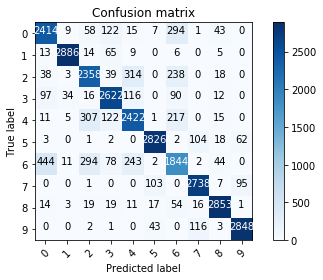

In [10]:
plt.figure()
plot_confusion_matrix(neural_conf_matrix_val, np.arange(10))
plt.savefig("cm_sigmoid_2h_val.png")
plt.show()

In [11]:
## Result with sigmoid, 512 hidden neurons and 1 hidden layer TEST
neural_y_pred = neural_model_sigmoid_1.Predict(dataset_test, target_test)
neural_conf_matrix = confusion_matrix(target_test, neural_y_pred)
neural_class_report = classification_report(target_test, neural_y_pred)
print(neural_conf_matrix)
print(neural_class_report)

[[803   4  23  37   3   4 114   0  12   0]
 [  2 970   2  18   2   1   5   0   0   0]
 [ 17   1 780  13 102   0  80   0   7   0]
 [ 34  16  11 885  32   0  17   0   5   0]
 [  1   1  91  26 812   0  66   0   3   0]
 [  1   0   1   0   0 929   0  41   6  22]
 [140   4  87  40  81   1 631   0  15   1]
 [  0   0   0   0   0  36   0 920   1  43]
 [  2   1  10   2   4   7  10   4 959   1]
 [  0   0   0   0   0  10   0  38   3 949]]
             precision    recall  f1-score   support

          0       0.80      0.80      0.80      1000
          1       0.97      0.97      0.97      1000
          2       0.78      0.78      0.78      1000
          3       0.87      0.89      0.88      1000
          4       0.78      0.81      0.80      1000
          5       0.94      0.93      0.93      1000
          6       0.68      0.63      0.66      1000
          7       0.92      0.92      0.92      1000
          8       0.95      0.96      0.95      1000
          9       0.93      0.95      

Confusion matrix, without normalization
[[803   4  23  37   3   4 114   0  12   0]
 [  2 970   2  18   2   1   5   0   0   0]
 [ 17   1 780  13 102   0  80   0   7   0]
 [ 34  16  11 885  32   0  17   0   5   0]
 [  1   1  91  26 812   0  66   0   3   0]
 [  1   0   1   0   0 929   0  41   6  22]
 [140   4  87  40  81   1 631   0  15   1]
 [  0   0   0   0   0  36   0 920   1  43]
 [  2   1  10   2   4   7  10   4 959   1]
 [  0   0   0   0   0  10   0  38   3 949]]


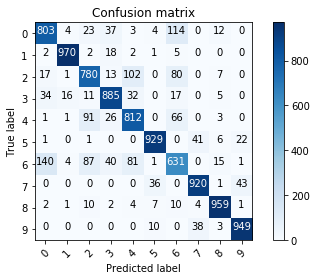

In [12]:
plt.figure()
plot_confusion_matrix(neural_conf_matrix, np.arange(10))
plt.savefig("cm_sigmoid_2h.png")
plt.show()